In [120]:
import sympy as sp

V_m, R, T, a, b = sp.symbols('V_m R T a b')
P = sp.symbols('P')

# Peng-Robinson equation of state
P_eq = (R * T / (V_m - b)) - (a / (V_m * (V_m + b) + b * (V_m - b)))

integral = sp.integrate(P_eq, V_m)

integral_result = sp.simplify(integral)
integral_result




KeyboardInterrupt: 

Total work done by the Stirling engine: -0.09 J
Isothermal efficiency: -0.12
Carnot efficiency: 0.6


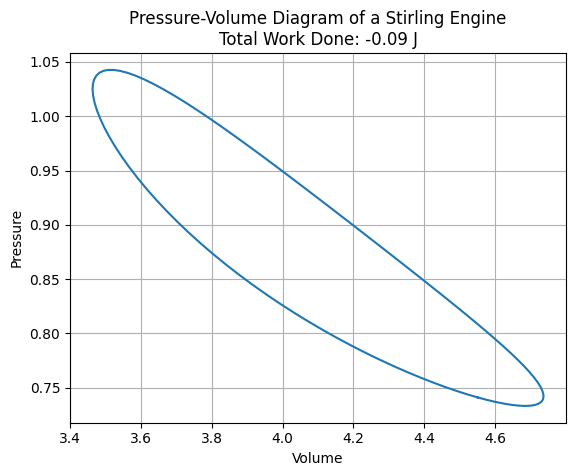

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
V_CLEARANCE = 0.01    # Reserved volume
V_SWEPT = 0.9       # Swept volume
V_K = 1             # Volume for isothermal processes (heater, cooler, regenerator)
V_R = 1
V_H = 1

# Isothermal Stirling engine efficiency (Carnot efficiency)
def carnot_efficiency(hot_temp: float, cold_temp: float) -> float:
    return 1.0 - cold_temp / hot_temp

# Assuming a simple sinusoidal volume change for alpha configuration
def compression_volume(theta: float) -> float:
    return V_CLEARANCE + V_SWEPT*(1 + np.cos(theta))/2.

def expansion_volume(theta: float, alpha=np.pi/2) -> float:
    return V_CLEARANCE + V_SWEPT * (1+ np.cos(theta + alpha))/2.

# Engine parameters
SPEED = 1.0
LOAD = 1.0
MASS = 1
PRESSURE = 10
ITER_COUNT = 0
MAX_ITER = 100

# Temperatures (K)
TEMP_HOT = 500          # Temperature of the hot source
TEMP_COLD = 200         # Temperature of the cold source
MASS_AIR = 0.00144      # Mass in kg 
GAS_CONSTANT = 8.314    # Universal gas constant (J/(mol·K))

# Intermediate temperatures
TEMP_COLD_COMP = TEMP_COLD
TEMP_EXP = TEMP_HOT
TEMP_REG = (TEMP_HOT - TEMP_COLD) / np.log(TEMP_HOT / TEMP_COLD)

# Crank angles and corresponding pressures and volumes
crank_angles = np.linspace(0, 2 * np.pi, 100)
pressures = np.zeros_like(crank_angles)
volumes = np.zeros_like(crank_angles)

# Calculate pressures and volumes at different crank angles
for i, alpha in enumerate(crank_angles):
    p = (MASS_AIR * GAS_CONSTANT) / (
        (compression_volume(alpha) / TEMP_COLD_COMP) + 
        (V_K / TEMP_COLD) + 
        (V_R / TEMP_REG) + 
        (V_H / TEMP_HOT) + 
        (expansion_volume(alpha) / TEMP_EXP)
    )
    volumes[i] = (compression_volume(alpha) + V_K + V_R + V_H + expansion_volume(alpha))
    pressures[i] = p

Wc, We = np.trapz(pressures[:50], volumes[:50]), np.trapz(pressures[50:], volumes[50:]) 
work_done = Wc + We
Qc, Qe = Wc, We
isothermal_efficiency = work_done/Qe
print(f'Total work done by the Stirling engine: {work_done:.2f} J')
print(f'Isothermal efficiency: {isothermal_efficiency:.2f}')
print(f'Carnot efficiency: {carnot_efficiency(TEMP_HOT, TEMP_COLD)}')


# Plot pressure vs. volume
plt.plot(volumes, pressures)
plt.xlabel('Volume')
plt.ylabel('Pressure')
plt.title(f'Pressure-Volume Diagram of a Stirling Engine\nTotal Work Done: {work_done:.2f} J')
plt.grid(True)
plt.show()


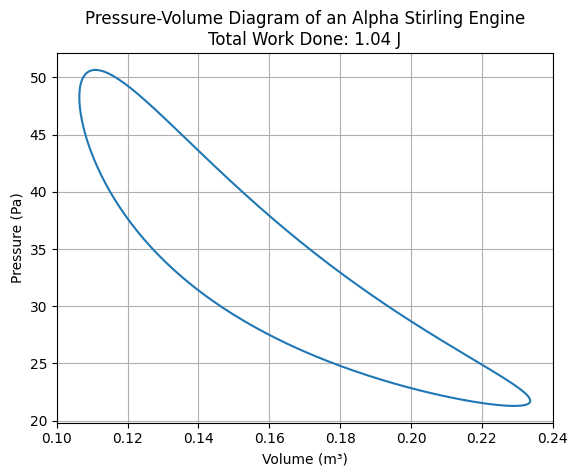

Total work done by the Stirling engine: 1.04 J
Isothermal efficiency: 0.46
Carnot efficiency: 0.57


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Ve_dead = 0.01    # Expansion cylinder dead volume (in m³)
Vc_dead = 0.01    # Compression cylinder dead volume (in m³)
Ve_swept = 0.09   # Expansion cylinder swept volume (in m³)
Vc_swept = 0.09   # Compression cylinder swept volume (in m³)
Vr = 0.02         # Regenerator volume (in m³)
Vk = 0.02         # Cooler volume (in m³)
Vh = 0.02         # Heater volume (in m³)
Th = 700          # Temperature of the hot source (K)
Tk = 300          # Temperature of the cold source (K)
M = 0.00144       # Mass in kg
R = 8.314         # Universal gas constant (J/(mol·K))

# Intermediate temperatures
Tc, Te = Tk, Th 
Tr = (Th - Tk) / np.log(Th / Tk)

# Crank angles and corresponding pressures and volumes
n_points = 300
crank_angles = np.linspace(0, 2 * np.pi, n_points)
pressures = np.zeros_like(crank_angles)
volumes = np.zeros_like(crank_angles)

def expansion_volume(theta):
    return Ve_dead + Ve_swept * (1 + np.sin(theta)) / 2

def compression_volume(theta):
    return Vc_dead + Vc_swept * (1 + np.cos(theta)) / 2

# Calculate pressures and volumes at different crank angles
for i, alpha in enumerate(crank_angles):
    p = (M * R) / (
        (compression_volume(alpha) / Tc) + 
        (Vk / Tk) + 
        (Vr / Tr) + 
        (Vh / Th) + 
        (expansion_volume(alpha) / Te)
    )
    volumes[i] = (compression_volume(alpha) + expansion_volume(alpha) + Vh + Vk + Vr)
    pressures[i] = p

# Calculate the total work done as the area under the PV curve
work_done = -np.trapz(pressures, volumes)

# Plot pressure vs. volume
plt.plot(volumes, pressures)
plt.xlabel('Volume (m³)')
plt.ylabel('Pressure (Pa)')
plt.title(f'Pressure-Volume Diagram of an Alpha Stirling Engine\nTotal Work Done: {work_done:.2f} J')
plt.grid(True)
plt.show()


# Calculate the isothermal efficiency
Qc = np.trapz(pressures[:int(n_points/2)], volumes[:int(n_points/2)])
Qh = np.trapz(pressures[int(n_points/2):], volumes[int(n_points/2):])
isothermal_efficiency = work_done / Qh

# Calculate the Carnot efficiency
def carnot_efficiency(hot_source_temp, cold_source_temp):
    return 1.0 - cold_source_temp / hot_source_temp

carnot_eff = carnot_efficiency(Th, Tk)
print(f'Total work done by the Stirling engine: {work_done:.2f} J')
print(f'Isothermal efficiency: {isothermal_efficiency:.2f}')
print(f'Carnot efficiency: {carnot_eff:.2f}')



Test:  0.0005246 0.0001533 2.824036430119697e-06 mass:  5.288774935468729
=====================  Schmidt analysis  ===============

 Work(joules) 7.972e+02,  Power(watts) 3.326e+04
 Qexp(joules) 1.130e+03,  Qcom(joules) -3.332e+02
 indicated efficiency 0.705



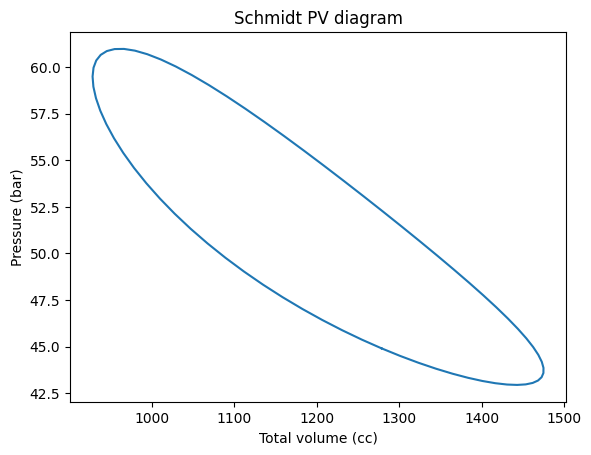

In [ ]:
# Schmidt analysis
import numpy as np 
import matplotlib.pyplot as plt

def pipes(inner_diameter, length, number_of_pipes):
    area = (number_of_pipes*np.pi*inner_diameter**2)/4
    volume = area * length # maybe???
    wetted_area = number_of_pipes * np.pi * inner_diameter * length
    return area, wetted_area, volume


def plot_pv(vswc, vclc, vcle, vswe):
    theta = np.linspace(0, 360, 72)
    vc = vclc + 0.5*vswc*(1 + np.cos(theta*np.pi/180)) 
    ve = vcle + 0.5*vswe*(1 + np.cos(theta*np.pi/180 + alpha)) 
    p = mgas*rgas/(vc/tk + vk/tk + vr/tr + vh/th + ve/th)*1e-5; # [bar]
    vtot = (vc + vk + vr + vh + ve)*1e6; # [cc]
    plt.plot(vtot, p)
    plt.xlabel('Total volume (cc)')
    plt.ylabel('Pressure (bar)')
    plt.title('Schmidt PV diagram')


# Cooler
dk = 1.08e-3 # cooler hydraulic diameter (m)
lk = 46.1e-3 # cooler effective length (m)
no_ktubes = 312

# Heater 
dh = 3.02e-3 # heater hydraulic diameter (m)
lh = 245.3e-3 # heater effective length (m)
no_htubes = 40

# Regenerator
lr = 22.6e-3 # Regenerator effective length (m)
cqwr = 1 # Regenerator housing thermal conductance (W/k)
### matrix_type = None
vr = 1 # regenerator void volume (m^3)
ar = 1 # regenerator internal free flow area (m^2)
awgr0 = 1 # no matrix regenerator wetted area (m^2)
dr = 22.6e-3 # ??? regenerator hydraulic diameter (m)

# Working fluid (gas)
rgas = 2.0769 # gas constant (J/kg.K)
cp = 5.1926 # specific heat capacity of gas at constant pressure (J/kg.K)
cv = 3.1156 # specific heat capacity of gas at constant volume (J/kg.K)
gamma = cp/cv # specific heat capacities ratio
mu0 = 10 # dynamic viscosity of gas at ref. temperature (kg.m/s)
t0, t_suth = 250, 500 #  reference temp. [K], Sutherland constant [K]

# Operation
pmean = 4.13e6 # mean pressure (Pa)
tk, th = 288, 977 # cooler and heater temperatures (K)
freq = 41.72# Cycle frequency (hertz) 

# Alpha engine 
r=30*(10**(-3))       #crank length (m)
vclc=153.3*(10**(-6))   # Compression cylinder dead volume or clearance volum (m^3) 
vcle=153.3*(10**(-6))  # Dead volume cylinder expansion or clearance volum(m^3)
vh=133.34*(10**(-6))  # volume of heater (m^3)
vk=44.45*(10**(-6))  # volume of cooler (m^3)
vr=472.62*(10**(-6))  # volume of regenerator (m^3)
vswc=524.6*(10**(-6))   # Compression cylinder displacement (m^3)
vswe=524.6*(10**(-6))  # Displacement expansion cylinder (m^3)
alpha=np.pi/2 


# Heat Exchangers

## Cooler (assuming smooth pipes)
ak, akwk, vk = pipes(dk, lk, no_ktubes)

## Heater (assuming smooth pipes)
ah, ahwh, vh = pipes(dh, lh, no_htubes)

# Operation
tr = (th - tk)/np.log(th/tk)
omega = 2*np.pi*freq

## Schmidt analysis 
c = (((vswe/th)**2 + (vswc/tk)**2 + 2*(vswe/th)*(vswc/tk)*np.cos(alpha))**0.5)/2 
s = (vswc/2 + vclc + vk)/tk + vr/tr + (vswe/2 + vcle + vh)/th 
b = c/s 
sqrtb = (1 - b**2)**0.5 
bf = (1 - 1/sqrtb) 
beta = np.arctan(vswe*np.sin(alpha)/th/(vswe*np.cos(alpha)/th + vswc/tk)) 

mgas = pmean*s*sqrtb/rgas
wc = (np.pi*vswc*mgas*rgas*np.sin(beta)*bf/c)   
we = (np.pi*vswe*mgas*rgas*np.sin(beta - alpha)*bf/c) 
w = (wc + we) 
power = w*freq 
eff = w/we; # qe = we
print('Test: ', vswc, vclc, s, 'mass: ', mgas)
# Printout Schmidt analysis results
print('=====================  Schmidt analysis  ===============\n')
print(f' Work(joules) {w:.3e},  Power(watts) {power:.3e}') 
print(f' Qexp(joules) {we:.3e},  Qcom(joules) {wc:.3e}') 
print(f' indicated efficiency {eff:.3f}') 
print(f'========================================================\n')

plot_pv(vclc, vcle, vcle, vswe)

In [148]:
# Ideal Adiabatic Analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

ALPHA = np.pi/2
VC_CLEARANCE, VE_CLEARANCE = 153.3*(10**(-6)), 153.3*(10**(-6))
VC_SWEPT, VE_SWEPT = 524.6*(10**(-6)), 524.6*(10**(-6)) 



T_h = 977
T_k = 288
T_r = (T_h - T_k)/np.log(T_h/T_k)
# Initial conditions
T_he = T_h
T_ck = T_k
T_e = T_h 
T_c = T_k 

state = {
    "T_c": T_c,
    "T_e": T_e,
    "T_ck": T_ck,
    "T_he": T_he,
}

R_gas = 2.0769 # gas constant (J/kg.K)
cp_gas = 5.1926 # specific heat capacity of gas at constant pressure (J/kg.K)
cv_gas = 3.1156 # specific heat capacity of gas at constant volume (J/kg.K)
gamma = cp_gas/cv_gas # specific heat capacities ratio

V_k, V_h, V_r = 44.45*(10**(-6)), 133.34*(10**(-6)), 472.62*(10**(-6))
M_gas = 0.00144

def calculate_space_volumes(theta):
    vc = VC_CLEARANCE + 0.5*VC_SWEPT*(1 + np.cos(theta + np.pi))
    ve = VE_SWEPT + 0.5*VE_SWEPT*(1 + np.cos(theta + ALPHA + np.pi))
    return vc, ve

def calculate_space_volumes_derivatives(theta):
    dvc = -0.5*VC_SWEPT*np.sin(theta + np.pi)
    dve = -0.5*VE_SWEPT*np.sin(theta + ALPHA + np.pi)
    return dvc, dve

def adiabatic_system(Y, theta):
    print("Theta: ", theta*180/np.pi)
    V_c, V_e = calculate_space_volumes(theta)
    dV_c, dV_e = calculate_space_volumes_derivatives(theta)

    T_c = state["T_c"]
    T_e = state["T_e"]
    T_ck =  state["T_ck"]
    T_he =  state["T_he"]

    P = M_gas*R_gas/(V_c/T_c + V_k/T_k + V_r/T_r + V_h/T_h + V_e/T_e)

    # print(T_ck)
    
    dP_numerator = (-P*dV_c/T_ck + dV_e/T_he)
    dP_denominator = V_c/(T_ck*gamma) + V_k/T_k + V_r/T_r + V_h/T_h + V_e/(T_he*gamma)
    dP = dP_numerator/dP_denominator

    m_c, m_k, m_r, m_h, m_e = P*V_c/(R_gas*T_c), P*V_k/(R_gas*T_k), P*V_r/(R_gas*T_r), \
        P*V_h/(R_gas*T_h), P*V_e/(R_gas*T_e)
    dm_k, dm_r, dm_h = m_k*dP/P, m_r*dP/P, m_h*dP/P
    dm_c = (P*dV_c + V_c*dP/gamma)/(R_gas*T_ck)
    dm_e = (P*dV_e + V_e*dP/gamma)/(R_gas*T_he)

    m_ck = -dm_c 
    m_kr = m_ck - dm_k 
    m_he = dm_e
    m_rh = m_he + dm_h 
    
    T_ck = T_c if m_ck > 0 else T_k 
    T_he = T_h if m_he > 0 else T_e 

    dT_c = T_c*(dP/P + dV_c/V_c + dm_c/m_c)
    dT_e = T_e*(dP/P + dV_e/V_e + dm_e/m_e)
    dQ_k = V_k*cv_gas*dP/R_gas - cp_gas*(T_ck*m_ck - T_k*m_kr)
    dQ_r = V_r*cv_gas*dP/R_gas - cp_gas*(T_k*m_kr - T_h*m_rh)
    dQ_h = V_h*cv_gas*dP/R_gas - cp_gas*(T_h*m_rh - T_he*m_he)
    dW_c = P*dV_c
    dW_e = P*dV_e

    dY_dtheta = [dT_c, dT_e, dQ_k, dQ_r, dQ_h, dW_c, dW_e]

    state["T_c"] = T_c
    state["T_e"] = T_e
    state["T_ck"] = T_ck
    state["T_he"] = T_he
    return dY_dtheta

tol = 1 # Allowable error in temperature (K)
max_iter = 20 # Maximum number of iterations 
# N = 360
# dtheta = 2.0*np.pi/N

current_iter = 0
calc_tol = 10*tol

theta_range = np.linspace(0, 2*np.pi, 361)

T_c0 = T_c
T_e0 = T_e
Y0 = [T_c0, T_e0, 0, 0, 0, 0, 0]

while calc_tol > tol and current_iter < max_iter:
    # Cyclic initial conditions 
    print(f"----------------Iteration: {current_iter+1}-----------------")
    T_c0 = state["T_c"]
    T_e0 = state["T_e"]
    
    Y0 = [T_c0, T_e0, 0, 0, 0, 0, 0]
    print(Y0)

    sol = odeint(adiabatic_system, Y0, t=theta_range)
    state["T_c"], state["T_e"] = sol[-1,0], sol[-1, 1]

    T_c, T_e = state["T_c"], state["T_e"]
    
    calc_tol = np.abs(T_c0 - T_c) + np.abs(T_e0 - T_e)
    # print('Calculated tol.: ', calc_tol)

    current_iter += 1


# print("Iteration count: ", current_iter)
# print(sol[:, 1])

----------------Iteration: 1-----------------
[288, 977, 0, 0, 0, 0, 0]
Theta:  0.0
Theta:  0.00012205870592993352
Theta:  0.00012205870592993352
Theta:  0.00024411741185986703
Theta:  0.00024411741185986703
Theta:  0.22107429756109812
Theta:  0.22107429756109812
Theta:  0.4419044777103363
Theta:  0.4419044777103363
Theta:  0.6627346578595745
Theta:  0.6627346578595745
Theta:  1.1386707148510418
Theta:  1.1386707148510418
Theta:  1.6146067718425086
Theta:  1.6146067718425086
Theta:  2.090542828833976
Theta:  2.090542828833976
Theta:  2.566478885825443
Theta:  2.566478885825443
Theta:  4.023735115406992
Theta:  4.023735115406992
Theta:  3.5548589537280746
Theta:  3.5548589537280746
Theta:  4.543239021630706
Theta:  4.543239021630706
Theta:  5.531619089533338
Theta:  5.531619089533338
Theta:  6.51999915743597
Theta:  6.51999915743597
Theta:  7.508379225338602
Theta:  7.508379225338602
Theta:  9.011881200301977
Theta:  9.011881200301977
Theta:  10.515383175265352
Theta:  10.51538317526535

C:\Users\Nehemiah\AppData\Local\Temp\ipykernel_17892\1568507882.py:117: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(adiabatic_system, Y0, t=theta_range)
C:\Users\Nehemiah\AppData\Local\Temp\ipykernel_17892\1568507882.py:68: RuntimeWarning: overflow encountered in scalar divide
  dm_e = (P*dV_e + V_e*dP/gamma)/(R_gas*T_he)
C:\Users\Nehemiah\AppData\Local\Temp\ipykernel_17892\1568507882.py:78: RuntimeWarning: overflow encountered in scalar multiply
  dT_c = T_c*(dP/P + dV_c/V_c + dm_c/m_c)
C:\Users\Nehemiah\AppData\Local\Temp\ipykernel_17892\1568507882.py:82: RuntimeWarning: invalid value encountered in scalar subtract
  dQ_h = V_h*cv_gas*dP/R_gas - cp_gas*(T_h*m_rh - T_he*m_he)


In [ ]:
values = np.linspace(0, 360, 361)
values